In [1]:
from best_approximate import *
from decision import *
from plot import *

import numpy as np
import time
from IPython.display import display, Math

-------------------------------

### Example: plotting best approximates under sine

In [2]:
X,d = 550,10
Y = approx(X,d)
display(Math(r'{}|_{} = {}'.format(X, '{'+str(d)+'}', Y)))
display(Math(r'\sin({}) \approx {:.5f},\ \sin({}) \approx {:.5f}'.format(
    X, np.sin(X), Y, np.sin(Y))))
print('error: ', np.abs(np.sin(X) - np.sin(Y)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

error:  0.05993142078921787


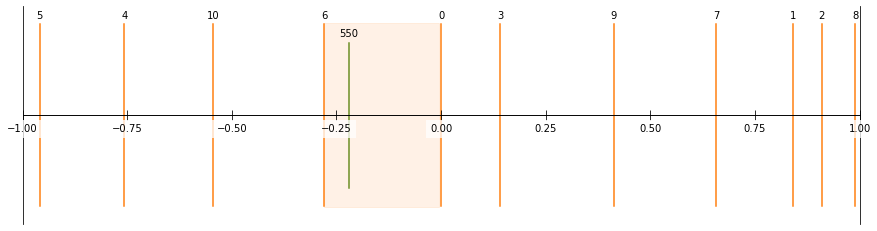

In [3]:
approximate_mesh(d, vals=[X], zones=[(Y,0)])

In [4]:
d = 50
Y = approx(X,d)
display(Math(r'{}|_{} = {}'.format(X, '{'+str(d)+'}', Y)))
display(Math(r'\sin({}) \approx {:.5f},\ \sin({}) \approx {:.5f}'.format(
    X, np.sin(X), Y, np.sin(Y))))
print('error: ', np.abs(np.sin(X) - np.sin(Y)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

error:  0.04289077629422078


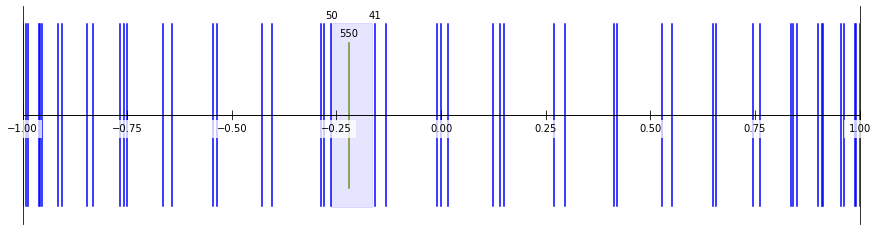

In [5]:
approximate_mesh(d,deg1_color='b',deg1_ann=False,
                 vals=[X,d,41],zones=[(d,41)])

### Example: plotting best difference approximates under sine

${\bf Best}(50,\, 550,\, 100,\, 140, 70)$

True


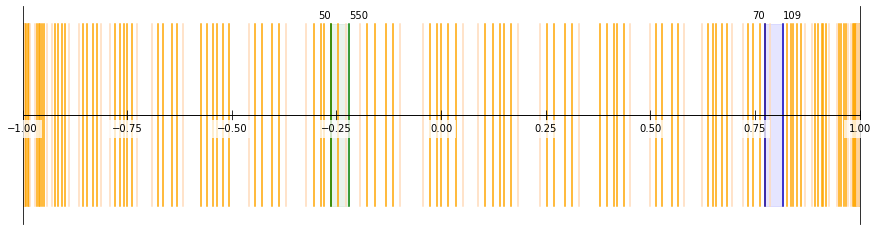

In [6]:
print(70 == diff_approx(50,550,100,140)[0])
diff_approx_mesh(50,550,100,140)

--------------------------

### Example: graphing $L_{\sin}$-inequality with level sets

$-x_1+x_2-2<2\sin(3x_1+2x_2-1)+\sin(2x_1)$

In [7]:
inequalities = [
    {
        'L-term': lambda x,y : -x + y - 2,
        'eps': gcd([(-1,1),(1,1)]),
        'osc-term': lambda x,y : 2*np.sin(3*x + 2*y - 1) + np.sin(2*x),
        'R': 3.
    },
]

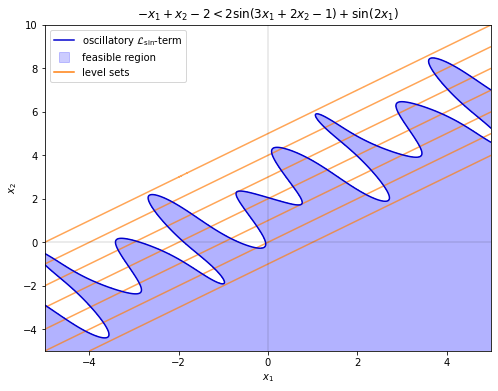

In [8]:
graph_level_sets(inequalities, xlim=(-5,5), ylim=(-5,10),
                 title=r'$-x_1+x_2-2<2\sin(3x_1+2x_2-1)+\sin(2x_1)$',
                 filename='single-L_sin-inequality')

### Example: graphing multiple $\mathcal{L}_{\sin}$-inequalities with level sets

\begin{align*}
    -3x_1 + x_2 - 2 &< 2\sin\big(3x_1 + \sin(x_2 - 1)\big) + \sin\big(\frac{1}{2}\big), \\
    2x_1 + \frac{4}{3}x_2 - 1 &< \sin(-3x_1 + 2x_2 - 1) + 2\sin(-2x_1), \\
    \frac{1}{2}x_1 - \frac{3}{2}x_2 - \frac{19}{2} &< -\sin\big(\frac{1}{2}x_1 + \frac{1}{3}x_2 + 2\big).
\end{align*}

In [9]:
inequalities = [
    {
        'L-term': lambda x,y : -3*x + y - 2,
        'eps': gcd([(-3,1),(1,1)]),
        'osc-term': lambda x,y : 2*np.sin(3*x + np.sin(y - 1)) + np.sin(1/2),
        'R': 4.
    }, {
        'L-term': lambda x,y : 2*x + 4/3*y - 1,
        'eps': gcd([(2,1),(4,3)]),
        'osc-term': lambda x,y : np.sin(-3*x + 2*y - 1) + 2*np.sin(-2*x),
        'R': 3.
    }, {
        'L-term': lambda x,y : 1/2*x - 3/2*y - 19/2,
        'eps': gcd([(1,2),(-3,2)]),
        'osc-term': lambda x,y : -np.sin(1/2*x + 1/3*y + 2),
        'R': 1.
    },
]

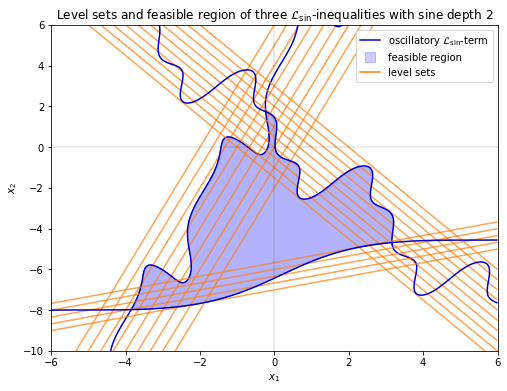

In [10]:
graph_level_sets(inequalities, xlim=(-6,6), ylim=(-10,6),
                 title=r'Level sets and feasible region of three $\mathcal{L}_{\sin}$-inequalities with sine depth 2',
                 legend_loc='upper right', filename='multiple-L_sin-inequalities')

### Example: projecting single $\mathcal{L}_{\sin}$-inequality with level sets and divisibility constraints

\begin{align*}
    -x_1 + x_2 + \frac{5}{4}x_3 - 2x_4 &< 2\sin(3x_1 + 2x_2 - 1) + \sin\big(\frac{1}{2}x_1 - \frac{1}{3}x_3\big) - \sin(\sin(x_4))
\end{align*}
constrained by
$$D_3\big(x_1 + 2x_2 - x_3 + 1\big) \text{ and } D_4(-x_1 + 2x_3 + x_4) . $$

In [11]:
inequality = {
    'L-term': lambda x,y,z,w : -x + y + 5/4*z - 2*w,
    'eps': gcd([(-1,1),(1,1),(5,4),(-2,1)]),
    'osc-term': lambda x,y,z,w : 2*np.sin(3*x + 2*y - 1) + np.sin(1/2*x - 1/3*z) - np.sin(np.sin(w)),
    'R': 4.,
}
divisibilities = [
    {'k': 3, 'p': (1, 2, -1, 0)},
    {'k': 4, 'p': (-1, 0, 2, 1)},
]
d = 4
n = 3

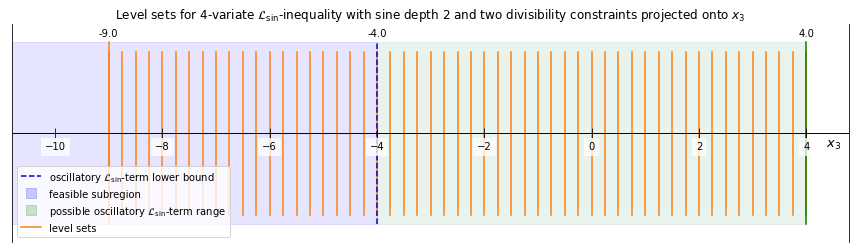

In [12]:
project_level_sets(inequality, divisibilities, d, n,
                   title='Level sets for 4-variate $\mathcal{L}_{\sin}$-inequality with sine depth 2 and two divisibility constraints projected onto $x_3$')